In [1]:
import ROOT
import copy
import yaml

Welcome to JupyROOT 6.22/06


In [5]:
def gen_P1_P2_dist(file,title,Nmax=10000):
    tree = file.Get("dihadron")
    Nmax=int(Nmax)
    # Create the histograms for each helicity
    nbins = 50
    xmin = -ROOT.TMath.Pi()
    xmax = ROOT.TMath.Pi()

    
    canvas = ROOT.TCanvas("c","c",600,600)
    # Draw the P1 P2 histograms
    canvas.cd()
    xmin = ymin = 0
    xmax = ymax = 8
    nbins = 100
    histogram = ROOT.TH2F("histogram", title+";Pion Momentum P_{1} (GeV);Pion Momentum P_{2} (GeV)", nbins, xmin, xmax, nbins, ymin, ymax)
    histogram.GetXaxis().SetNdivisions(5)
    histogram.GetYaxis().SetNdivisions(5)

    # Set the log scale on the z-axis
    ROOT.gStyle.SetOptStat(0)
    ROOT.gStyle.SetPalette(ROOT.kBird)
    ROOT.gStyle.SetPaintTextFormat("4.1f")
    ROOT.gStyle.SetNumberContours(999)
    ROOT.gStyle.SetPadRightMargin(0.16)

    tree.Draw("P2:P1>>histogram","xF1>0&&xF2>0&&z<0.95","colz",Nmax)
    histogram.GetZaxis().SetTitleOffset(1.2)
    histogram.GetZaxis().SetRangeUser(1, histogram.GetMaximum())
    histogram.GetZaxis().SetTitle("Counts")
    histogram.Draw("colz")
    ROOT.gPad.SetLogz(1)
    
    regions = [f"P1>0&&P1<1.25&&P2>0&&P2<1.25",
               f"P1>0&&P1<1.25&&P2>1.25&&P2<{ymax}",
               f"P1>1.25&&P1<{xmax}&&P2>1.25&&P2<{ymax}",
               f"P1>1.25&&P1<{xmax}&&P2>0&&P2<1.25"
              ]
    lines=[]
    
    for region in regions:
        region_variables = region.split("&&")
        P1_range = [float(region_variables[0].split(">")[1]), float(region_variables[1].split("<")[1])]
        P2_range = [float(region_variables[2].split(">")[1]), float(region_variables[3].split("<")[1])]

        # Draw TLines to mark the selected region
        for i, (x1, y1, x2, y2) in enumerate([(P1_range[0], P2_range[0], P1_range[1], P2_range[0]), 
                                           (P1_range[1], P2_range[0], P1_range[1], P2_range[1]), 
                                           (P1_range[1], P2_range[1], P1_range[0], P2_range[1]), 
                                           (P1_range[0], P2_range[1], P1_range[0], P2_range[0])]):
            line = ROOT.TLine(x1, y1, x2, y2)
            line.SetLineColor(ROOT.kRed)
            line.SetLineWidth(3)
            line.Draw()
            lines.append(line)
    latex=ROOT.TLatex()
    latex.SetTextColor(2)
    latex.DrawLatex(0.5,0.8,"R1")
    latex.DrawLatex(xmax-0.8,0.8,"R2")
    latex.DrawLatex(0.5,ymax-0.5,"R3")
    latex.DrawLatex(xmax-0.8,ymax-0.5,"R4")
    return copy.deepcopy(canvas)

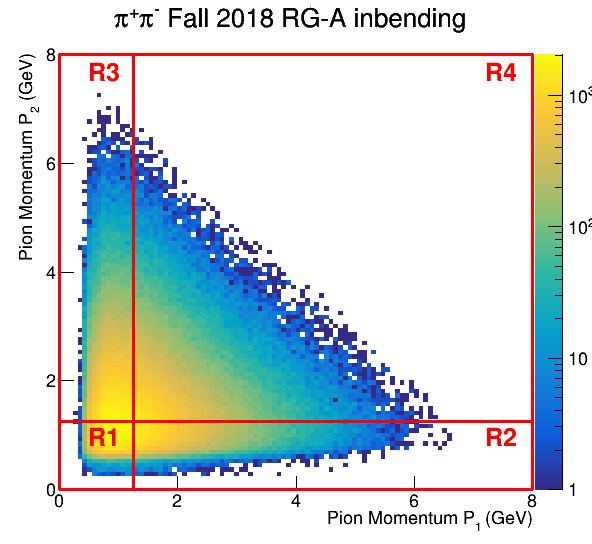

In [4]:
file = ROOT.TFile("../../projects/ana_v1/volatile/data/piplus_piminus/Fall2018_RGA_inbending_merged.root")
canvas = gen_P1_P2_dist(file,title="#pi^{+}#pi^{-} Fall 2018 RG-A inbending", Nmax=1e6)
canvas.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


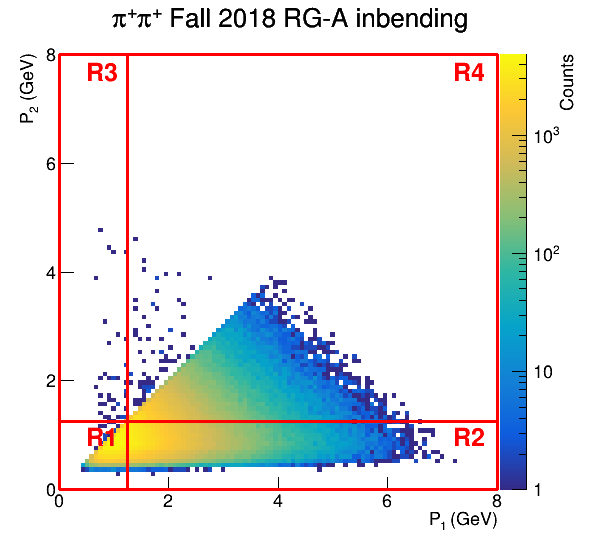

In [51]:
file = ROOT.TFile("../../projects/ana_v1/volatile/data/piplus_piplus/Fall2018_RGA_inbending_merged.root")
canvas = gen_P1_P2_dist(file,title="#pi^{+}#pi^{+} Fall 2018 RG-A inbending", Nmax=1e6)
canvas.Draw()

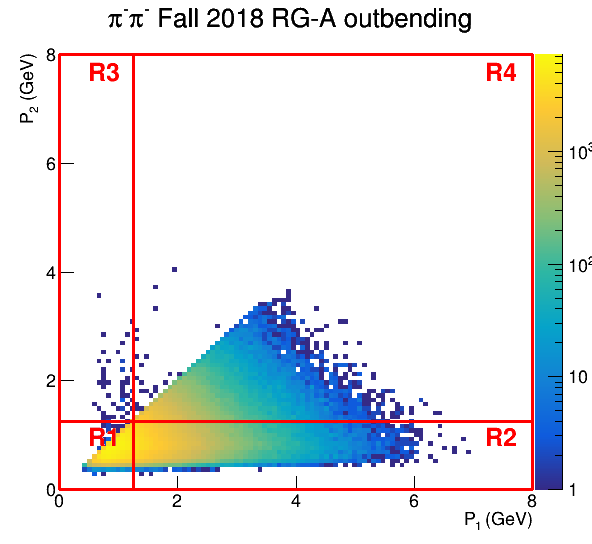

In [3]:
file = ROOT.TFile("../../projects/ana_v1/volatile/data/piminus_piminus/Fall2018_RGA_outbending_merged.root")
canvas = gen_P1_P2_dist(file,title="#pi^{-}#pi^{-} Fall 2018 RG-A outbending", Nmax=1e6)
canvas.Draw()